In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.3

## generate some random numbers from a univariate Gaussian distribution

In [2]:
RNG=np.random.default_rng()

In [3]:
μ=1
σ=2

In [4]:
X=RNG.normal(loc=μ,scale=σ,size=100000)

(array([5.0000e+00, 1.2000e+01, 3.4000e+01, 8.7000e+01, 2.1200e+02,
        4.4800e+02, 7.9900e+02, 1.4710e+03, 2.5000e+03, 3.8890e+03,
        5.5960e+03, 7.5400e+03, 9.4490e+03, 1.0773e+04, 1.1389e+04,
        1.0949e+04, 9.7950e+03, 7.9960e+03, 6.1930e+03, 4.3770e+03,
        2.9670e+03, 1.7110e+03, 9.4300e+02, 4.6600e+02, 2.1700e+02,
        1.0700e+02, 4.7000e+01, 2.1000e+01, 3.0000e+00, 1.0000e+00,
        3.0000e+00]),
 array([-7.29211172, -6.72580173, -6.15949173, -5.59318174, -5.02687175,
        -4.46056176, -3.89425177, -3.32794177, -2.76163178, -2.19532179,
        -1.6290118 , -1.06270181, -0.49639181,  0.06991818,  0.63622817,
         1.20253816,  1.76884815,  2.33515814,  2.90146814,  3.46777813,
         4.03408812,  4.60039811,  5.1667081 ,  5.7330181 ,  6.29932809,
         6.86563808,  7.43194807,  7.99825806,  8.56456806,  9.13087805,
         9.69718804, 10.26349803]),
 <BarContainer object of 31 artists>)

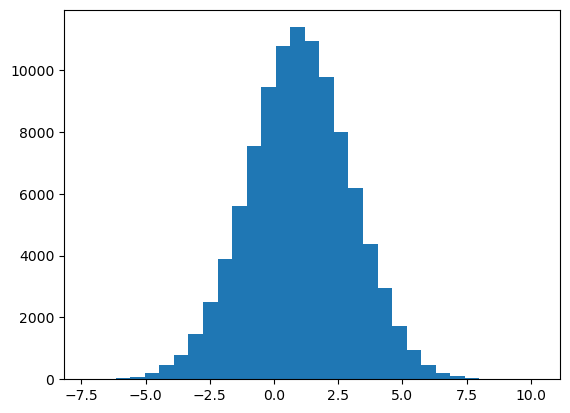

In [5]:
plt.hist(X,bins=31)

## compute the moment generating function $\phi$ from the samples, i.e. using eq (3), and using the known Gaussian MGF $\phi_G$ from eq. (5) 

In [6]:
phi= lambda λ,X: np.mean(np.exp(λ*X),axis=-1)
phi_G= lambda λ,μ,σ:np.exp(μ*λ+0.5*σ**2*λ**2)

In [7]:
λarr=np.linspace(-0.5,0.5,1000)
phiarr=np.array(phi(λarr[:,np.newaxis],X[np.newaxis,:]))

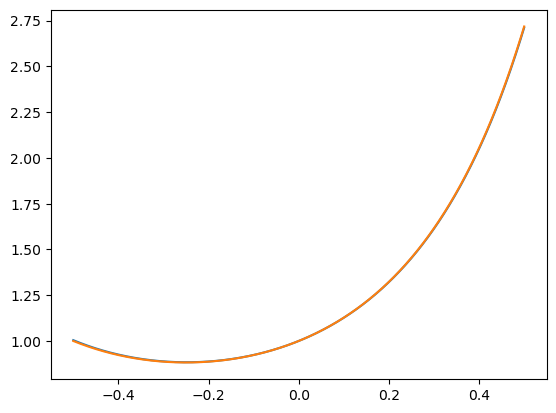

In [8]:
plt.plot(λarr,phiarr)
plt.plot(λarr,phi_G(λarr,μ,σ))

In [9]:
phi_G(0,μ,σ)

1.0

## get first/second moment as numerical derivatives of the MGF as a cross-check

In [15]:
first_moment=np.gradient(phi(λarr[:,np.newaxis],X[np.newaxis,:]),np.diff(λarr)[0])[np.abs(λarr)==np.abs(λarr).min()]

In [13]:
first_moment

array([0.9926912])

so the mean is 1 as expected

look at the second moment

In [19]:
second_moment=np.gradient(np.gradient(phi(λarr[:,np.newaxis],X[np.newaxis,:]), np.diff(λarr)[0]), np.diff(λarr)[0])[np.abs(λarr)==np.abs(λarr).min()]

In [20]:
second_moment

array([4.9824567])

compute sigma from the first 2 moments 

In [21]:
sigma=np.sqrt(second_moment-first_moment**2)

In [22]:
sigma

array([1.99925508])

so we get the expected σ=2

look at the third moment

In [23]:
third_moment=np.gradient(np.gradient(np.gradient(phi(λarr[:,np.newaxis],X[np.newaxis,:]),np.diff(λarr)[0]),np.diff(λarr)[0]),np.diff(λarr)[0])[np.abs(λarr)==np.abs(λarr).min()]

In [24]:
third_moment

array([12.8268731])

compute the third cumulant (skewness) from the first 3 moments

In [25]:
skewness=(third_moment-3*second_moment*first_moment+2*first_moment**3)/sigma**2

In [26]:
skewness

array([-0.01370588])

Gaussians have zero skewness, so this is expected as well

could do this for further moments as well, should be clear how this works by now...